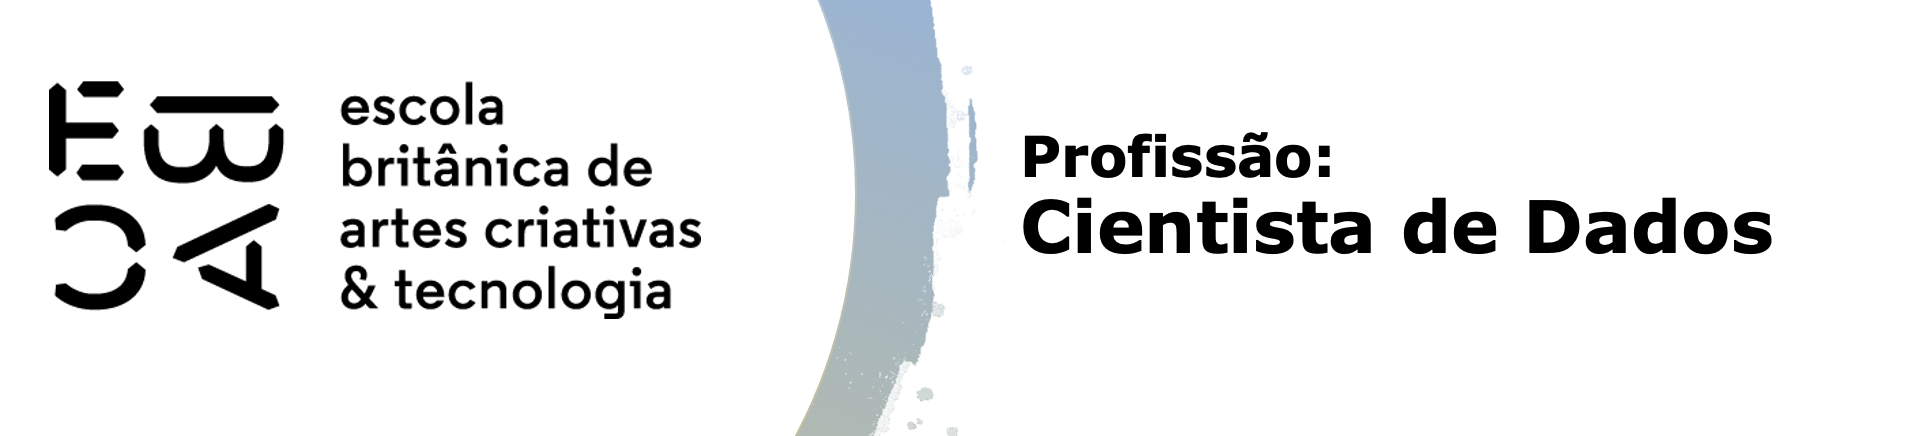

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [89]:
x_train = pd.read_csv(r'./dados_atividade/base_treino.csv').set_index(['index', 'individuo'])
y_train = pd.read_csv(r'./dados/train/y_train.txt')
x_test = pd.read_csv(r'./dados_atividade/base_teste.csv').set_index(['index', 'individuo'])
y_test = y_test = pd.read_csv(r'./dados/test/y_test.txt')

In [90]:
x_teste.head(3)

,,"('tBodyAcc-mean()-X',)","('tBodyAcc-mean()-Y',)","('tBodyAcc-mean()-Z',)","('tBodyAcc-std()-X',)","('tBodyAcc-std()-Y',)","('tBodyAcc-std()-Z',)","('tBodyAcc-mad()-X',)","('tBodyAcc-mad()-Y',)","('tBodyAcc-mad()-Z',)","('tBodyAcc-max()-X',)",...,"('fBodyBodyGyroJerkMag-meanFreq()',)","('fBodyBodyGyroJerkMag-skewness()',)","('fBodyBodyGyroJerkMag-kurtosis()',)","('angle(tBodyAccMean,gravity)',)","('angle(tBodyAccJerkMean),gravityMean)',)","('angle(tBodyGyroMean,gravityMean)',)","('angle(tBodyGyroJerkMean,gravityMean)',)","('angle(X,gravityMean)',)","('angle(Y,gravityMean)',)","('angle(Z,gravityMean)',)"
index,individuo,,,,,,,,,,,,,,,,,,,,,
0,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [91]:
#Capturando 25% da base de treinos
x_validation = x_train.sample(frac=0.25, random_state=1)
#Removendo dados capturados da base original
x_train = x_train.drop(x_validation.index)

y_validation = y_train.sample(frac=0.25, random_state=1)
y_train = y_train.drop(y_validation.index)

In [92]:
# Importando as 3 melhores variáveis do exercício anterior
melhores = pd.read_csv('melhores.csv').set_index('Unnamed: 0')

In [93]:
# Selecionando apenas as melhores colunas nos dataframes
x_train_best = x_train[melhores.index]
x_test_best = x_test[melhores.index]
x_validation_best = x_validation[melhores.index]

In [94]:
#Criando árvores com diferentes valores de poda
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(x_train_best, y_train)
#Capturando valores ccp_alpha e impurities
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [95]:
# Garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [96]:
# Definindo o estimator
clf = DecisionTreeClassifier(random_state=2360873)

# Definindo os hiperparâmetros que iremos testar
grid_parametros = {'ccp_alpha':ccp_alphas}

In [97]:
%%time
# Testando as possibilidades com diferentes ccp_alphas
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv = 10, verbose = 100) # O verbose serve para exibir o progresso da execução
grid.fit(x_train_best, y_train)

Fitting 10 folds for each of 91 candidates, totalling 910 fits
[CV 1/10; 1/91] START ccp_alpha=0.0.............................................
[CV 1/10; 1/91] END ..............ccp_alpha=0.0;, score=0.754 total time=   0.0s
[CV 2/10; 1/91] START ccp_alpha=0.0.............................................
[CV 2/10; 1/91] END ..............ccp_alpha=0.0;, score=0.707 total time=   0.0s
[CV 3/10; 1/91] START ccp_alpha=0.0.............................................
[CV 3/10; 1/91] END ..............ccp_alpha=0.0;, score=0.797 total time=   0.0s
[CV 4/10; 1/91] START ccp_alpha=0.0.............................................
[CV 4/10; 1/91] END ..............ccp_alpha=0.0;, score=0.686 total time=   0.0s
[CV 5/10; 1/91] START ccp_alpha=0.0.............................................
[CV 5/10; 1/91] END ..............ccp_alpha=0.0;, score=0.726 total time=   0.0s
[CV 6/10; 1/91] START ccp_alpha=0.0.............................................
[CV 6/10; 1/91] END ..............ccp_alpha=0.

[CV 2/10; 6/91] END ccp_alpha=1.3169370528936034e-05;, score=0.707 total time=   0.0s
[CV 3/10; 6/91] START ccp_alpha=1.3169370528936034e-05..........................
[CV 3/10; 6/91] END ccp_alpha=1.3169370528936034e-05;, score=0.797 total time=   0.0s
[CV 4/10; 6/91] START ccp_alpha=1.3169370528936034e-05..........................
[CV 4/10; 6/91] END ccp_alpha=1.3169370528936034e-05;, score=0.686 total time=   0.0s
[CV 5/10; 6/91] START ccp_alpha=1.3169370528936034e-05..........................
[CV 5/10; 6/91] END ccp_alpha=1.3169370528936034e-05;, score=0.726 total time=   0.0s
[CV 6/10; 6/91] START ccp_alpha=1.3169370528936034e-05..........................
[CV 6/10; 6/91] END ccp_alpha=1.3169370528936034e-05;, score=0.775 total time=   0.0s
[CV 7/10; 6/91] START ccp_alpha=1.3169370528936034e-05..........................
[CV 7/10; 6/91] END ccp_alpha=1.3169370528936034e-05;, score=0.766 total time=   0.0s
[CV 8/10; 6/91] START ccp_alpha=1.3169370528936034e-05.........................

[CV 2/10; 11/91] END ccp_alpha=3.455037012083941e-05;, score=0.707 total time=   0.0s
[CV 3/10; 11/91] START ccp_alpha=3.455037012083941e-05..........................
[CV 3/10; 11/91] END ccp_alpha=3.455037012083941e-05;, score=0.797 total time=   0.0s
[CV 4/10; 11/91] START ccp_alpha=3.455037012083941e-05..........................
[CV 4/10; 11/91] END ccp_alpha=3.455037012083941e-05;, score=0.686 total time=   0.0s
[CV 5/10; 11/91] START ccp_alpha=3.455037012083941e-05..........................
[CV 5/10; 11/91] END ccp_alpha=3.455037012083941e-05;, score=0.726 total time=   0.0s
[CV 6/10; 11/91] START ccp_alpha=3.455037012083941e-05..........................
[CV 6/10; 11/91] END ccp_alpha=3.455037012083941e-05;, score=0.775 total time=   0.0s
[CV 7/10; 11/91] START ccp_alpha=3.455037012083941e-05..........................
[CV 7/10; 11/91] END ccp_alpha=3.455037012083941e-05;, score=0.766 total time=   0.0s
[CV 8/10; 11/91] START ccp_alpha=3.455037012083941e-05.........................

[CV 9/10; 16/91] END ccp_alpha=6.506360460255961e-05;, score=0.811 total time=   0.0s
[CV 10/10; 16/91] START ccp_alpha=6.506360460255961e-05.........................
[CV 10/10; 16/91] END ccp_alpha=6.506360460255961e-05;, score=0.793 total time=   0.0s
[CV 1/10; 17/91] START ccp_alpha=8.384223149323841e-05..........................
[CV 1/10; 17/91] END ccp_alpha=8.384223149323841e-05;, score=0.754 total time=   0.0s
[CV 2/10; 17/91] START ccp_alpha=8.384223149323841e-05..........................
[CV 2/10; 17/91] END ccp_alpha=8.384223149323841e-05;, score=0.707 total time=   0.0s
[CV 3/10; 17/91] START ccp_alpha=8.384223149323841e-05..........................
[CV 3/10; 17/91] END ccp_alpha=8.384223149323841e-05;, score=0.797 total time=   0.0s
[CV 4/10; 17/91] START ccp_alpha=8.384223149323841e-05..........................
[CV 4/10; 17/91] END ccp_alpha=8.384223149323841e-05;, score=0.686 total time=   0.0s
[CV 5/10; 17/91] START ccp_alpha=8.384223149323841e-05........................

[CV 1/10; 22/91] END ccp_alpha=0.00012192125861312851;, score=0.754 total time=   0.0s
[CV 2/10; 22/91] START ccp_alpha=0.00012192125861312851.........................
[CV 2/10; 22/91] END ccp_alpha=0.00012192125861312851;, score=0.707 total time=   0.0s
[CV 3/10; 22/91] START ccp_alpha=0.00012192125861312851.........................
[CV 3/10; 22/91] END ccp_alpha=0.00012192125861312851;, score=0.797 total time=   0.0s
[CV 4/10; 22/91] START ccp_alpha=0.00012192125861312851.........................
[CV 4/10; 22/91] END ccp_alpha=0.00012192125861312851;, score=0.686 total time=   0.0s
[CV 5/10; 22/91] START ccp_alpha=0.00012192125861312851.........................
[CV 5/10; 22/91] END ccp_alpha=0.00012192125861312851;, score=0.726 total time=   0.0s
[CV 6/10; 22/91] START ccp_alpha=0.00012192125861312851.........................
[CV 6/10; 22/91] END ccp_alpha=0.00012192125861312851;, score=0.775 total time=   0.0s
[CV 7/10; 22/91] START ccp_alpha=0.00012192125861312851..................

[CV 4/10; 27/91] END ccp_alpha=0.00020317777029186298;, score=0.677 total time=   0.0s
[CV 5/10; 27/91] START ccp_alpha=0.00020317777029186298.........................
[CV 5/10; 27/91] END ccp_alpha=0.00020317777029186298;, score=0.733 total time=   0.0s
[CV 6/10; 27/91] START ccp_alpha=0.00020317777029186298.........................
[CV 6/10; 27/91] END ccp_alpha=0.00020317777029186298;, score=0.771 total time=   0.0s
[CV 7/10; 27/91] START ccp_alpha=0.00020317777029186298.........................
[CV 7/10; 27/91] END ccp_alpha=0.00020317777029186298;, score=0.775 total time=   0.0s
[CV 8/10; 27/91] START ccp_alpha=0.00020317777029186298.........................
[CV 8/10; 27/91] END ccp_alpha=0.00020317777029186298;, score=0.691 total time=   0.0s
[CV 9/10; 27/91] START ccp_alpha=0.00020317777029186298.........................
[CV 9/10; 27/91] END ccp_alpha=0.00020317777029186298;, score=0.815 total time=   0.0s
[CV 10/10; 27/91] START ccp_alpha=0.00020317777029186298.................

[CV 8/10; 32/91] END ccp_alpha=0.0003021545894429799;, score=0.686 total time=   0.0s
[CV 9/10; 32/91] START ccp_alpha=0.0003021545894429799..........................
[CV 9/10; 32/91] END ccp_alpha=0.0003021545894429799;, score=0.804 total time=   0.0s
[CV 10/10; 32/91] START ccp_alpha=0.0003021545894429799.........................
[CV 10/10; 32/91] END ccp_alpha=0.0003021545894429799;, score=0.795 total time=   0.0s
[CV 1/10; 33/91] START ccp_alpha=0.00030771641509896516.........................
[CV 1/10; 33/91] END ccp_alpha=0.00030771641509896516;, score=0.770 total time=   0.0s
[CV 2/10; 33/91] START ccp_alpha=0.00030771641509896516.........................
[CV 2/10; 33/91] END ccp_alpha=0.00030771641509896516;, score=0.721 total time=   0.0s
[CV 3/10; 33/91] START ccp_alpha=0.00030771641509896516.........................
[CV 3/10; 33/91] END ccp_alpha=0.00030771641509896516;, score=0.792 total time=   0.0s
[CV 4/10; 33/91] START ccp_alpha=0.00030771641509896516....................

[CV 3/10; 38/91] END ccp_alpha=0.000391801197170325;, score=0.793 total time=   0.0s
[CV 4/10; 38/91] START ccp_alpha=0.000391801197170325...........................
[CV 4/10; 38/91] END ccp_alpha=0.000391801197170325;, score=0.704 total time=   0.0s
[CV 5/10; 38/91] START ccp_alpha=0.000391801197170325...........................
[CV 5/10; 38/91] END ccp_alpha=0.000391801197170325;, score=0.722 total time=   0.0s
[CV 6/10; 38/91] START ccp_alpha=0.000391801197170325...........................
[CV 6/10; 38/91] END ccp_alpha=0.000391801197170325;, score=0.757 total time=   0.0s
[CV 7/10; 38/91] START ccp_alpha=0.000391801197170325...........................
[CV 7/10; 38/91] END ccp_alpha=0.000391801197170325;, score=0.784 total time=   0.0s
[CV 8/10; 38/91] START ccp_alpha=0.000391801197170325...........................
[CV 8/10; 38/91] END ccp_alpha=0.000391801197170325;, score=0.706 total time=   0.0s
[CV 9/10; 38/91] START ccp_alpha=0.000391801197170325...........................
[CV 

[CV 4/10; 43/91] END ccp_alpha=0.0004275186956476853;, score=0.702 total time=   0.0s
[CV 5/10; 43/91] START ccp_alpha=0.0004275186956476853..........................
[CV 5/10; 43/91] END ccp_alpha=0.0004275186956476853;, score=0.722 total time=   0.0s
[CV 6/10; 43/91] START ccp_alpha=0.0004275186956476853..........................
[CV 6/10; 43/91] END ccp_alpha=0.0004275186956476853;, score=0.755 total time=   0.0s
[CV 7/10; 43/91] START ccp_alpha=0.0004275186956476853..........................
[CV 7/10; 43/91] END ccp_alpha=0.0004275186956476853;, score=0.788 total time=   0.0s
[CV 8/10; 43/91] START ccp_alpha=0.0004275186956476853..........................
[CV 8/10; 43/91] END ccp_alpha=0.0004275186956476853;, score=0.702 total time=   0.0s
[CV 9/10; 43/91] START ccp_alpha=0.0004275186956476853..........................
[CV 9/10; 43/91] END ccp_alpha=0.0004275186956476853;, score=0.793 total time=   0.0s
[CV 10/10; 43/91] START ccp_alpha=0.0004275186956476853........................

[CV 6/10; 48/91] END ccp_alpha=0.0004897325793058911;, score=0.751 total time=   0.0s
[CV 7/10; 48/91] START ccp_alpha=0.0004897325793058911..........................
[CV 7/10; 48/91] END ccp_alpha=0.0004897325793058911;, score=0.771 total time=   0.0s
[CV 8/10; 48/91] START ccp_alpha=0.0004897325793058911..........................
[CV 8/10; 48/91] END ccp_alpha=0.0004897325793058911;, score=0.706 total time=   0.0s
[CV 9/10; 48/91] START ccp_alpha=0.0004897325793058911..........................
[CV 9/10; 48/91] END ccp_alpha=0.0004897325793058911;, score=0.819 total time=   0.0s
[CV 10/10; 48/91] START ccp_alpha=0.0004897325793058911.........................
[CV 10/10; 48/91] END ccp_alpha=0.0004897325793058911;, score=0.771 total time=   0.0s
[CV 1/10; 49/91] START ccp_alpha=0.0005006301332089068..........................
[CV 1/10; 49/91] END ccp_alpha=0.0005006301332089068;, score=0.719 total time=   0.0s
[CV 2/10; 49/91] START ccp_alpha=0.0005006301332089068........................

[CV 6/10; 53/91] END ccp_alpha=0.0006495850186550335;, score=0.780 total time=   0.0s
[CV 7/10; 53/91] START ccp_alpha=0.0006495850186550335..........................
[CV 7/10; 53/91] END ccp_alpha=0.0006495850186550335;, score=0.777 total time=   0.0s
[CV 8/10; 53/91] START ccp_alpha=0.0006495850186550335..........................
[CV 8/10; 53/91] END ccp_alpha=0.0006495850186550335;, score=0.715 total time=   0.0s
[CV 9/10; 53/91] START ccp_alpha=0.0006495850186550335..........................
[CV 9/10; 53/91] END ccp_alpha=0.0006495850186550335;, score=0.831 total time=   0.0s
[CV 10/10; 53/91] START ccp_alpha=0.0006495850186550335.........................
[CV 10/10; 53/91] END ccp_alpha=0.0006495850186550335;, score=0.744 total time=   0.0s
[CV 1/10; 54/91] START ccp_alpha=0.0006527402500556864..........................
[CV 1/10; 54/91] END ccp_alpha=0.0006527402500556864;, score=0.723 total time=   0.0s
[CV 2/10; 54/91] START ccp_alpha=0.0006527402500556864........................

[CV 9/10; 58/91] END ccp_alpha=0.0007028318005663321;, score=0.829 total time=   0.0s
[CV 10/10; 58/91] START ccp_alpha=0.0007028318005663321.........................
[CV 10/10; 58/91] END ccp_alpha=0.0007028318005663321;, score=0.739 total time=   0.0s
[CV 1/10; 59/91] START ccp_alpha=0.0007667428151816825..........................
[CV 1/10; 59/91] END ccp_alpha=0.0007667428151816825;, score=0.743 total time=   0.0s
[CV 2/10; 59/91] START ccp_alpha=0.0007667428151816825..........................
[CV 2/10; 59/91] END ccp_alpha=0.0007667428151816825;, score=0.703 total time=   0.0s
[CV 3/10; 59/91] START ccp_alpha=0.0007667428151816825..........................
[CV 3/10; 59/91] END ccp_alpha=0.0007667428151816825;, score=0.810 total time=   0.0s
[CV 4/10; 59/91] START ccp_alpha=0.0007667428151816825..........................
[CV 4/10; 59/91] END ccp_alpha=0.0007667428151816825;, score=0.679 total time=   0.0s
[CV 5/10; 59/91] START ccp_alpha=0.0007667428151816825........................

[CV 4/10; 64/91] END ccp_alpha=0.0008626494720941879;, score=0.684 total time=   0.0s
[CV 5/10; 64/91] START ccp_alpha=0.0008626494720941879..........................
[CV 5/10; 64/91] END ccp_alpha=0.0008626494720941879;, score=0.728 total time=   0.0s
[CV 6/10; 64/91] START ccp_alpha=0.0008626494720941879..........................
[CV 6/10; 64/91] END ccp_alpha=0.0008626494720941879;, score=0.777 total time=   0.0s
[CV 7/10; 64/91] START ccp_alpha=0.0008626494720941879..........................
[CV 7/10; 64/91] END ccp_alpha=0.0008626494720941879;, score=0.784 total time=   0.0s
[CV 8/10; 64/91] START ccp_alpha=0.0008626494720941879..........................
[CV 8/10; 64/91] END ccp_alpha=0.0008626494720941879;, score=0.715 total time=   0.0s
[CV 9/10; 64/91] START ccp_alpha=0.0008626494720941879..........................
[CV 9/10; 64/91] END ccp_alpha=0.0008626494720941879;, score=0.840 total time=   0.0s
[CV 10/10; 64/91] START ccp_alpha=0.0008626494720941879........................

[CV 4/10; 69/91] END ccp_alpha=0.0012434911437707473;, score=0.755 total time=   0.0s
[CV 5/10; 69/91] START ccp_alpha=0.0012434911437707473..........................
[CV 5/10; 69/91] END ccp_alpha=0.0012434911437707473;, score=0.773 total time=   0.0s
[CV 6/10; 69/91] START ccp_alpha=0.0012434911437707473..........................
[CV 6/10; 69/91] END ccp_alpha=0.0012434911437707473;, score=0.804 total time=   0.0s
[CV 7/10; 69/91] START ccp_alpha=0.0012434911437707473..........................
[CV 7/10; 69/91] END ccp_alpha=0.0012434911437707473;, score=0.766 total time=   0.0s
[CV 8/10; 69/91] START ccp_alpha=0.0012434911437707473..........................
[CV 8/10; 69/91] END ccp_alpha=0.0012434911437707473;, score=0.731 total time=   0.0s
[CV 9/10; 69/91] START ccp_alpha=0.0012434911437707473..........................
[CV 9/10; 69/91] END ccp_alpha=0.0012434911437707473;, score=0.824 total time=   0.0s
[CV 10/10; 69/91] START ccp_alpha=0.0012434911437707473........................

[CV 4/10; 74/91] END ccp_alpha=0.0016986576435590109;, score=0.779 total time=   0.0s
[CV 5/10; 74/91] START ccp_alpha=0.0016986576435590109..........................
[CV 5/10; 74/91] END ccp_alpha=0.0016986576435590109;, score=0.797 total time=   0.0s
[CV 6/10; 74/91] START ccp_alpha=0.0016986576435590109..........................
[CV 6/10; 74/91] END ccp_alpha=0.0016986576435590109;, score=0.728 total time=   0.0s
[CV 7/10; 74/91] START ccp_alpha=0.0016986576435590109..........................
[CV 7/10; 74/91] END ccp_alpha=0.0016986576435590109;, score=0.731 total time=   0.0s
[CV 8/10; 74/91] START ccp_alpha=0.0016986576435590109..........................
[CV 8/10; 74/91] END ccp_alpha=0.0016986576435590109;, score=0.731 total time=   0.0s
[CV 9/10; 74/91] START ccp_alpha=0.0016986576435590109..........................
[CV 9/10; 74/91] END ccp_alpha=0.0016986576435590109;, score=0.855 total time=   0.0s
[CV 10/10; 74/91] START ccp_alpha=0.0016986576435590109........................

[CV 8/10; 79/91] END ccp_alpha=0.0033086775309142044;, score=0.757 total time=   0.0s
[CV 9/10; 79/91] START ccp_alpha=0.0033086775309142044..........................
[CV 9/10; 79/91] END ccp_alpha=0.0033086775309142044;, score=0.842 total time=   0.0s
[CV 10/10; 79/91] START ccp_alpha=0.0033086775309142044.........................
[CV 10/10; 79/91] END ccp_alpha=0.0033086775309142044;, score=0.751 total time=   0.0s
[CV 1/10; 80/91] START ccp_alpha=0.003472458195348577...........................
[CV 1/10; 80/91] END ccp_alpha=0.003472458195348577;, score=0.774 total time=   0.0s
[CV 2/10; 80/91] START ccp_alpha=0.003472458195348577...........................
[CV 2/10; 80/91] END ccp_alpha=0.003472458195348577;, score=0.766 total time=   0.0s
[CV 3/10; 80/91] START ccp_alpha=0.003472458195348577...........................
[CV 3/10; 80/91] END ccp_alpha=0.003472458195348577;, score=0.842 total time=   0.0s
[CV 4/10; 80/91] START ccp_alpha=0.003472458195348577...........................


[CV 3/10; 85/91] END ccp_alpha=0.011888243931208686;, score=0.817 total time=   0.0s
[CV 4/10; 85/91] START ccp_alpha=0.011888243931208686...........................
[CV 4/10; 85/91] END ccp_alpha=0.011888243931208686;, score=0.791 total time=   0.0s
[CV 5/10; 85/91] START ccp_alpha=0.011888243931208686...........................
[CV 5/10; 85/91] END ccp_alpha=0.011888243931208686;, score=0.728 total time=   0.0s
[CV 6/10; 85/91] START ccp_alpha=0.011888243931208686...........................
[CV 6/10; 85/91] END ccp_alpha=0.011888243931208686;, score=0.799 total time=   0.0s
[CV 7/10; 85/91] START ccp_alpha=0.011888243931208686...........................
[CV 7/10; 85/91] END ccp_alpha=0.011888243931208686;, score=0.704 total time=   0.0s
[CV 8/10; 85/91] START ccp_alpha=0.011888243931208686...........................
[CV 8/10; 85/91] END ccp_alpha=0.011888243931208686;, score=0.728 total time=   0.0s
[CV 9/10; 85/91] START ccp_alpha=0.011888243931208686...........................
[CV 

[CV 10/10; 90/91] END ccp_alpha=0.16654698681226027;, score=0.381 total time=   0.0s
[CV 1/10; 91/91] START ccp_alpha=0.18838426244766615............................
[CV 1/10; 91/91] END ccp_alpha=0.18838426244766615;, score=0.196 total time=   0.0s
[CV 2/10; 91/91] START ccp_alpha=0.18838426244766615............................
[CV 2/10; 91/91] END ccp_alpha=0.18838426244766615;, score=0.196 total time=   0.0s
[CV 3/10; 91/91] START ccp_alpha=0.18838426244766615............................
[CV 3/10; 91/91] END ccp_alpha=0.18838426244766615;, score=0.380 total time=   0.0s
[CV 4/10; 91/91] START ccp_alpha=0.18838426244766615............................
[CV 4/10; 91/91] END ccp_alpha=0.18838426244766615;, score=0.381 total time=   0.0s
[CV 5/10; 91/91] START ccp_alpha=0.18838426244766615............................
[CV 5/10; 91/91] END ccp_alpha=0.18838426244766615;, score=0.381 total time=   0.0s
[CV 6/10; 91/91] START ccp_alpha=0.18838426244766615............................
[CV 6/10;

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.71099500e-06, 9.89150599e-06, 1.21176143e-05,
       1.28812793e-05, 1.31693705e-05, 1.47798806e-05, 1.64748210e-05,
       2.75951669e-05, 2.92180720e-05, 3.45503701e-05, 3.61422599e-05,
       4.10097871e-05, 4.40360013e-05, 6.46261841e-05, 6.50636046e-05,
       8.384...
       1.24349114e-03, 1.29795791e-03, 1.30520391e-03, 1.37122881e-03,
       1.64486544e-03, 1.69865764e-03, 1.75481761e-03, 2.19957548e-03,
       2.22592415e-03, 2.39052190e-03, 3.30867753e-03, 3.47245820e-03,
       3.83296081e-03, 4.80382990e-03, 5.47108180e-03, 7.48408672e-03,
       1.18882439e-02, 1.19591222e-02, 3.12955924e-02, 4.66720489e-02,
       1.07710423e-01, 1.66546987e-01, 1.88384262e-01])},
             verbose=100)

In [98]:
#Obtendo resumo do que foi feito pela função acima
resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by = 'rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
78,0.030626,0.003990,0.008154,0.002144,0.003309,{'ccp_alpha': 0.0033086775309142044},0.773551,0.766304,0.842391,0.807623,0.773140,0.782214,0.718693,0.756806,0.842105,0.751361,0.781419,0.037270,1
75,0.034314,0.007222,0.009088,0.002203,0.0022,{'ccp_alpha': 0.00219957547787681},0.795290,0.771739,0.847826,0.780399,0.796733,0.731397,0.731397,0.731397,0.860254,0.762250,0.780868,0.043609,2


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [99]:
# Extraindo o melhor ccp_alpha
melhor_ccp = resultados.iloc[grid.best_index_, 4]
melhor_ccp

0.0033086775309142044

In [100]:
# Treinando nosso modelo final
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(x_train_best, y_train)

In [101]:
print('Acurácia alcançada na base de testes: ', clf.score(x_test_best, y_test))

Acurácia alcançada na base de testes:  0.7019687712152071


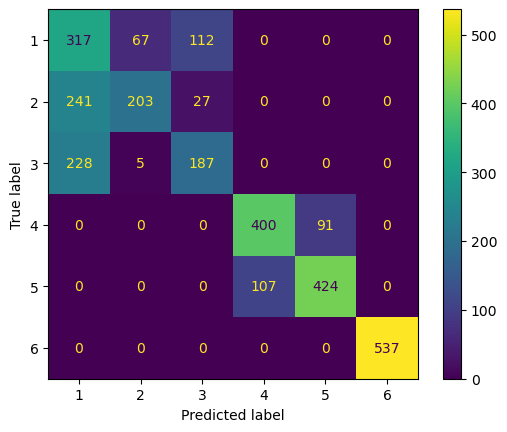

In [102]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                     X=x_test_best,
                                     y=y_test)
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [103]:
#Criando matriz de confusão com os acertos e os erros do modelo
matriz = confusion_matrix(y_true=y_test,
                         y_pred=clf.predict(x_test_best))
matriz

array([[317,  67, 112,   0,   0,   0],
       [241, 203,  27,   0,   0,   0],
       [228,   5, 187,   0,   0,   0],
       [  0,   0,   0, 400,  91,   0],
       [  0,   0,   0, 107, 424,   0],
       [  0,   0,   0,   0,   0, 537]], dtype=int64)

In [104]:
#Extraindo quantidades de acertos e erros por Atividade/classe
acertos = [matriz[x,x] for x in range(6)]
erros = sum(matriz) - acertos

In [105]:
#Criando dataframe com quantidade de erros e acertos por classe(Atividade)
pd.DataFrame(data={'acertos':acertos, 'erros': erros}, index=pd.Index(data=list(range(1,7)),
                                                                     name='classe')
                                                                     ).sort_values(by='erros', ascending=False)

,acertos,erros
classe,,
1,317,469
3,187,139
4,400,107
5,424,91
2,203,72
6,537,0


> A classe 1 possui o maior número de erros.

In [106]:
#Exibindo quantidade de linhas por classe na base de treino
print(y_train.value_counts().sort_index())

5
1     903
2     791
3     757
4     957
5    1033
6    1072
dtype: int64


In [107]:
#Identificando classes do tipo 1
y_train_2 = y_train == 1
y_train_2 = y_train_2.rename(columns={'5':'classe_1'})
y_train_2.value_counts()

classe_1
False       4610
True         903
dtype: int64

In [108]:
#Criando árvore com os dados binários de y_train
clf_2 = DecisionTreeClassifier(min_samples_leaf=20, 
                               max_depth=4, 
                               random_state=2360873).fit(X=x_train, 
                                                    y=y_train_2)

In [114]:
# Criando um dataframe com os nomes das colunas de x_train e os valores de importancia
melhores_classe1 = (pd.DataFrame(data={'var': x_train.columns, 
                                       'feature_importances_': clf_2.feature_importances_})
                      .sort_values(by='feature_importances_', 
                                   ascending=False))

In [118]:
melhores_classe1.head(2)

,var,feature_importances_
503,"('fBodyAccMag-std()',)",0.367199
166,"('tBodyGyroJerk-mad()-X',)",0.348710


In [117]:
# Capturando os 3 maiores valores de importancia
melhores = melhores_classe1.query('feature_importances_ > 0').sort_values(by='feature_importances_', ascending = False)[0:3]
melhores

,var,feature_importances_
503,"('fBodyAccMag-std()',)",0.367199
166,"('tBodyGyroJerk-mad()-X',)",0.348710
65,"('tGravityAcc-arCoeff()-X,1',)",0.127810


In [125]:
# Selecionando apenas as 3 melhores colunas nos dataframes
x_train_3 = x_train[melhores['var']]
x_test_3 = x_test[melhores['var']]
x_validation_3 = x_validation[melhores['var']]

In [128]:
#Criando árvores com diferentes valores de poda
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(x_train_3, y_train)
#Capturando valores ccp_alpha e impurities
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [129]:
# Garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [130]:
# Definindo o estimator
clf = DecisionTreeClassifier(random_state=2360873)

# Definindo os hiperparâmetros que iremos testar
grid_parametros = {'ccp_alpha':ccp_alphas}

In [131]:
%%time
# Testando as possibilidades com diferentes ccp_alphas
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros, cv = 10, verbose = 100) # O verbose serve para exibir o progresso da execução
grid.fit(x_train_3, y_train)

Fitting 10 folds for each of 149 candidates, totalling 1490 fits
[CV 1/10; 1/149] START ccp_alpha=0.0............................................
[CV 1/10; 1/149] END .............ccp_alpha=0.0;, score=0.571 total time=   0.0s
[CV 2/10; 1/149] START ccp_alpha=0.0............................................
[CV 2/10; 1/149] END .............ccp_alpha=0.0;, score=0.571 total time=   0.0s
[CV 3/10; 1/149] START ccp_alpha=0.0............................................
[CV 3/10; 1/149] END .............ccp_alpha=0.0;, score=0.621 total time=   0.0s
[CV 4/10; 1/149] START ccp_alpha=0.0............................................
[CV 4/10; 1/149] END .............ccp_alpha=0.0;, score=0.566 total time=   0.0s
[CV 5/10; 1/149] START ccp_alpha=0.0............................................
[CV 5/10; 1/149] END .............ccp_alpha=0.0;, score=0.566 total time=   0.0s
[CV 6/10; 1/149] START ccp_alpha=0.0............................................
[CV 6/10; 1/149] END .............ccp_alpha=

[CV 10/10; 5/149] END ccp_alpha=1.5115786927868198e-05;, score=0.564 total time=   0.0s
[CV 1/10; 6/149] START ccp_alpha=2.3788850485579596e-05.........................
[CV 1/10; 6/149] END ccp_alpha=2.3788850485579596e-05;, score=0.571 total time=   0.0s
[CV 2/10; 6/149] START ccp_alpha=2.3788850485579596e-05.........................
[CV 2/10; 6/149] END ccp_alpha=2.3788850485579596e-05;, score=0.571 total time=   0.0s
[CV 3/10; 6/149] START ccp_alpha=2.3788850485579596e-05.........................
[CV 3/10; 6/149] END ccp_alpha=2.3788850485579596e-05;, score=0.621 total time=   0.0s
[CV 4/10; 6/149] START ccp_alpha=2.3788850485579596e-05.........................
[CV 4/10; 6/149] END ccp_alpha=2.3788850485579596e-05;, score=0.566 total time=   0.0s
[CV 5/10; 6/149] START ccp_alpha=2.3788850485579596e-05.........................
[CV 5/10; 6/149] END ccp_alpha=2.3788850485579596e-05;, score=0.566 total time=   0.0s
[CV 6/10; 6/149] START ccp_alpha=2.3788850485579596e-05.................

[CV 4/10; 11/149] END ccp_alpha=5.724368140475446e-05;, score=0.566 total time=   0.0s
[CV 5/10; 11/149] START ccp_alpha=5.724368140475446e-05.........................
[CV 5/10; 11/149] END ccp_alpha=5.724368140475446e-05;, score=0.566 total time=   0.0s
[CV 6/10; 11/149] START ccp_alpha=5.724368140475446e-05.........................
[CV 6/10; 11/149] END ccp_alpha=5.724368140475446e-05;, score=0.608 total time=   0.0s
[CV 7/10; 11/149] START ccp_alpha=5.724368140475446e-05.........................
[CV 7/10; 11/149] END ccp_alpha=5.724368140475446e-05;, score=0.648 total time=   0.0s
[CV 8/10; 11/149] START ccp_alpha=5.724368140475446e-05.........................
[CV 8/10; 11/149] END ccp_alpha=5.724368140475446e-05;, score=0.648 total time=   0.0s
[CV 9/10; 11/149] START ccp_alpha=5.724368140475446e-05.........................
[CV 9/10; 11/149] END ccp_alpha=5.724368140475446e-05;, score=0.619 total time=   0.0s
[CV 10/10; 11/149] START ccp_alpha=5.724368140475446e-05.................

[CV 9/10; 16/149] END ccp_alpha=7.213147446280652e-05;, score=0.619 total time=   0.0s
[CV 10/10; 16/149] START ccp_alpha=7.213147446280652e-05........................
[CV 10/10; 16/149] END ccp_alpha=7.213147446280652e-05;, score=0.564 total time=   0.0s
[CV 1/10; 17/149] START ccp_alpha=7.263430082222024e-05.........................
[CV 1/10; 17/149] END ccp_alpha=7.263430082222024e-05;, score=0.571 total time=   0.0s
[CV 2/10; 17/149] START ccp_alpha=7.263430082222024e-05.........................
[CV 2/10; 17/149] END ccp_alpha=7.263430082222024e-05;, score=0.571 total time=   0.0s
[CV 3/10; 17/149] START ccp_alpha=7.263430082222024e-05.........................
[CV 3/10; 17/149] END ccp_alpha=7.263430082222024e-05;, score=0.621 total time=   0.0s
[CV 4/10; 17/149] START ccp_alpha=7.263430082222024e-05.........................
[CV 4/10; 17/149] END ccp_alpha=7.263430082222024e-05;, score=0.566 total time=   0.0s
[CV 5/10; 17/149] START ccp_alpha=7.263430082222024e-05.................

[CV 8/10; 21/149] END ccp_alpha=9.46343064529339e-05;, score=0.648 total time=   0.0s
[CV 9/10; 21/149] START ccp_alpha=9.46343064529339e-05..........................
[CV 9/10; 21/149] END ccp_alpha=9.46343064529339e-05;, score=0.619 total time=   0.0s
[CV 10/10; 21/149] START ccp_alpha=9.46343064529339e-05.........................
[CV 10/10; 21/149] END ccp_alpha=9.46343064529339e-05;, score=0.564 total time=   0.0s
[CV 1/10; 22/149] START ccp_alpha=9.539272921168466e-05.........................
[CV 1/10; 22/149] END ccp_alpha=9.539272921168466e-05;, score=0.571 total time=   0.0s
[CV 2/10; 22/149] START ccp_alpha=9.539272921168466e-05.........................
[CV 2/10; 22/149] END ccp_alpha=9.539272921168466e-05;, score=0.571 total time=   0.0s
[CV 3/10; 22/149] START ccp_alpha=9.539272921168466e-05.........................
[CV 3/10; 22/149] END ccp_alpha=9.539272921168466e-05;, score=0.621 total time=   0.0s
[CV 4/10; 22/149] START ccp_alpha=9.539272921168466e-05....................

[CV 2/10; 27/149] END ccp_alpha=0.00013755246824131116;, score=0.571 total time=   0.0s
[CV 3/10; 27/149] START ccp_alpha=0.00013755246824131116........................
[CV 3/10; 27/149] END ccp_alpha=0.00013755246824131116;, score=0.621 total time=   0.0s
[CV 4/10; 27/149] START ccp_alpha=0.00013755246824131116........................
[CV 4/10; 27/149] END ccp_alpha=0.00013755246824131116;, score=0.568 total time=   0.0s
[CV 5/10; 27/149] START ccp_alpha=0.00013755246824131116........................
[CV 5/10; 27/149] END ccp_alpha=0.00013755246824131116;, score=0.564 total time=   0.0s
[CV 6/10; 27/149] START ccp_alpha=0.00013755246824131116........................
[CV 6/10; 27/149] END ccp_alpha=0.00013755246824131116;, score=0.608 total time=   0.0s
[CV 7/10; 27/149] START ccp_alpha=0.00013755246824131116........................
[CV 7/10; 27/149] END ccp_alpha=0.00013755246824131116;, score=0.648 total time=   0.0s
[CV 8/10; 27/149] START ccp_alpha=0.00013755246824131116...........

[CV 3/10; 32/149] END ccp_alpha=0.00014762222584485934;, score=0.621 total time=   0.0s
[CV 4/10; 32/149] START ccp_alpha=0.00014762222584485934........................
[CV 4/10; 32/149] END ccp_alpha=0.00014762222584485934;, score=0.568 total time=   0.0s
[CV 5/10; 32/149] START ccp_alpha=0.00014762222584485934........................
[CV 5/10; 32/149] END ccp_alpha=0.00014762222584485934;, score=0.564 total time=   0.0s
[CV 6/10; 32/149] START ccp_alpha=0.00014762222584485934........................
[CV 6/10; 32/149] END ccp_alpha=0.00014762222584485934;, score=0.608 total time=   0.0s
[CV 7/10; 32/149] START ccp_alpha=0.00014762222584485934........................
[CV 7/10; 32/149] END ccp_alpha=0.00014762222584485934;, score=0.648 total time=   0.0s
[CV 8/10; 32/149] START ccp_alpha=0.00014762222584485934........................
[CV 8/10; 32/149] END ccp_alpha=0.00014762222584485934;, score=0.644 total time=   0.0s
[CV 9/10; 32/149] START ccp_alpha=0.00014762222584485934...........

[CV 2/10; 37/149] END ccp_alpha=0.0001677495578867043;, score=0.571 total time=   0.0s
[CV 3/10; 37/149] START ccp_alpha=0.0001677495578867043.........................
[CV 3/10; 37/149] END ccp_alpha=0.0001677495578867043;, score=0.625 total time=   0.0s
[CV 4/10; 37/149] START ccp_alpha=0.0001677495578867043.........................
[CV 4/10; 37/149] END ccp_alpha=0.0001677495578867043;, score=0.568 total time=   0.0s
[CV 5/10; 37/149] START ccp_alpha=0.0001677495578867043.........................
[CV 5/10; 37/149] END ccp_alpha=0.0001677495578867043;, score=0.566 total time=   0.0s
[CV 6/10; 37/149] START ccp_alpha=0.0001677495578867043.........................
[CV 6/10; 37/149] END ccp_alpha=0.0001677495578867043;, score=0.608 total time=   0.0s
[CV 7/10; 37/149] START ccp_alpha=0.0001677495578867043.........................
[CV 7/10; 37/149] END ccp_alpha=0.0001677495578867043;, score=0.650 total time=   0.0s
[CV 8/10; 37/149] START ccp_alpha=0.0001677495578867043..................

[CV 6/10; 42/149] END ccp_alpha=0.00019421942813659934;, score=0.613 total time=   0.0s
[CV 7/10; 42/149] START ccp_alpha=0.00019421942813659934........................
[CV 7/10; 42/149] END ccp_alpha=0.00019421942813659934;, score=0.666 total time=   0.0s
[CV 8/10; 42/149] START ccp_alpha=0.00019421942813659934........................
[CV 8/10; 42/149] END ccp_alpha=0.00019421942813659934;, score=0.661 total time=   0.0s
[CV 9/10; 42/149] START ccp_alpha=0.00019421942813659934........................
[CV 9/10; 42/149] END ccp_alpha=0.00019421942813659934;, score=0.630 total time=   0.0s
[CV 10/10; 42/149] START ccp_alpha=0.00019421942813659934.......................
[CV 10/10; 42/149] END ccp_alpha=0.00019421942813659934;, score=0.574 total time=   0.0s
[CV 1/10; 43/149] START ccp_alpha=0.00019500304005702282........................
[CV 1/10; 43/149] END ccp_alpha=0.00019500304005702282;, score=0.582 total time=   0.0s
[CV 2/10; 43/149] START ccp_alpha=0.00019500304005702282..........

[CV 5/10; 47/149] END ccp_alpha=0.00020804819462537545;, score=0.572 total time=   0.0s
[CV 6/10; 47/149] START ccp_alpha=0.00020804819462537545........................
[CV 6/10; 47/149] END ccp_alpha=0.00020804819462537545;, score=0.619 total time=   0.0s
[CV 7/10; 47/149] START ccp_alpha=0.00020804819462537545........................
[CV 7/10; 47/149] END ccp_alpha=0.00020804819462537545;, score=0.673 total time=   0.0s
[CV 8/10; 47/149] START ccp_alpha=0.00020804819462537545........................
[CV 8/10; 47/149] END ccp_alpha=0.00020804819462537545;, score=0.662 total time=   0.0s
[CV 9/10; 47/149] START ccp_alpha=0.00020804819462537545........................
[CV 9/10; 47/149] END ccp_alpha=0.00020804819462537545;, score=0.630 total time=   0.0s
[CV 10/10; 47/149] START ccp_alpha=0.00020804819462537545.......................
[CV 10/10; 47/149] END ccp_alpha=0.00020804819462537545;, score=0.579 total time=   0.0s
[CV 1/10; 48/149] START ccp_alpha=0.00020805251317486222..........

[CV 4/10; 52/149] END ccp_alpha=0.00023955236240033465;, score=0.570 total time=   0.0s
[CV 5/10; 52/149] START ccp_alpha=0.00023955236240033465........................
[CV 5/10; 52/149] END ccp_alpha=0.00023955236240033465;, score=0.575 total time=   0.0s
[CV 6/10; 52/149] START ccp_alpha=0.00023955236240033465........................
[CV 6/10; 52/149] END ccp_alpha=0.00023955236240033465;, score=0.615 total time=   0.0s
[CV 7/10; 52/149] START ccp_alpha=0.00023955236240033465........................
[CV 7/10; 52/149] END ccp_alpha=0.00023955236240033465;, score=0.677 total time=   0.0s
[CV 8/10; 52/149] START ccp_alpha=0.00023955236240033465........................
[CV 8/10; 52/149] END ccp_alpha=0.00023955236240033465;, score=0.666 total time=   0.0s
[CV 9/10; 52/149] START ccp_alpha=0.00023955236240033465........................
[CV 9/10; 52/149] END ccp_alpha=0.00023955236240033465;, score=0.633 total time=   0.0s
[CV 10/10; 52/149] START ccp_alpha=0.00023955236240033465..........

[CV 3/10; 57/149] END ccp_alpha=0.0002990481102033444;, score=0.639 total time=   0.0s
[CV 4/10; 57/149] START ccp_alpha=0.0002990481102033444.........................
[CV 4/10; 57/149] END ccp_alpha=0.0002990481102033444;, score=0.561 total time=   0.0s
[CV 5/10; 57/149] START ccp_alpha=0.0002990481102033444.........................
[CV 5/10; 57/149] END ccp_alpha=0.0002990481102033444;, score=0.559 total time=   0.0s
[CV 6/10; 57/149] START ccp_alpha=0.0002990481102033444.........................
[CV 6/10; 57/149] END ccp_alpha=0.0002990481102033444;, score=0.626 total time=   0.0s
[CV 7/10; 57/149] START ccp_alpha=0.0002990481102033444.........................
[CV 7/10; 57/149] END ccp_alpha=0.0002990481102033444;, score=0.690 total time=   0.0s
[CV 8/10; 57/149] START ccp_alpha=0.0002990481102033444.........................
[CV 8/10; 57/149] END ccp_alpha=0.0002990481102033444;, score=0.666 total time=   0.0s
[CV 9/10; 57/149] START ccp_alpha=0.0002990481102033444..................

[CV 5/10; 62/149] END ccp_alpha=0.0003094693860720239;, score=0.561 total time=   0.0s
[CV 6/10; 62/149] START ccp_alpha=0.0003094693860720239.........................
[CV 6/10; 62/149] END ccp_alpha=0.0003094693860720239;, score=0.626 total time=   0.0s
[CV 7/10; 62/149] START ccp_alpha=0.0003094693860720239.........................
[CV 7/10; 62/149] END ccp_alpha=0.0003094693860720239;, score=0.695 total time=   0.0s
[CV 8/10; 62/149] START ccp_alpha=0.0003094693860720239.........................
[CV 8/10; 62/149] END ccp_alpha=0.0003094693860720239;, score=0.661 total time=   0.0s
[CV 9/10; 62/149] START ccp_alpha=0.0003094693860720239.........................
[CV 9/10; 62/149] END ccp_alpha=0.0003094693860720239;, score=0.662 total time=   0.0s
[CV 10/10; 62/149] START ccp_alpha=0.0003094693860720239........................
[CV 10/10; 62/149] END ccp_alpha=0.0003094693860720239;, score=0.590 total time=   0.0s
[CV 1/10; 63/149] START ccp_alpha=0.0003221914740038174.................

[CV 7/10; 67/149] END ccp_alpha=0.00033398497394523507;, score=0.724 total time=   0.0s
[CV 8/10; 67/149] START ccp_alpha=0.00033398497394523507........................
[CV 8/10; 67/149] END ccp_alpha=0.00033398497394523507;, score=0.670 total time=   0.0s
[CV 9/10; 67/149] START ccp_alpha=0.00033398497394523507........................
[CV 9/10; 67/149] END ccp_alpha=0.00033398497394523507;, score=0.661 total time=   0.0s
[CV 10/10; 67/149] START ccp_alpha=0.00033398497394523507.......................
[CV 10/10; 67/149] END ccp_alpha=0.00033398497394523507;, score=0.595 total time=   0.0s
[CV 1/10; 68/149] START ccp_alpha=0.0003345800830665523.........................
[CV 1/10; 68/149] END ccp_alpha=0.0003345800830665523;, score=0.582 total time=   0.0s
[CV 2/10; 68/149] START ccp_alpha=0.0003345800830665523.........................
[CV 2/10; 68/149] END ccp_alpha=0.0003345800830665523;, score=0.583 total time=   0.0s
[CV 3/10; 68/149] START ccp_alpha=0.0003345800830665523.............

[CV 1/10; 73/149] END ccp_alpha=0.00038367934892432194;, score=0.572 total time=   0.0s
[CV 2/10; 73/149] START ccp_alpha=0.00038367934892432194........................
[CV 2/10; 73/149] END ccp_alpha=0.00038367934892432194;, score=0.591 total time=   0.0s
[CV 3/10; 73/149] START ccp_alpha=0.00038367934892432194........................
[CV 3/10; 73/149] END ccp_alpha=0.00038367934892432194;, score=0.663 total time=   0.0s
[CV 4/10; 73/149] START ccp_alpha=0.00038367934892432194........................
[CV 4/10; 73/149] END ccp_alpha=0.00038367934892432194;, score=0.584 total time=   0.0s
[CV 5/10; 73/149] START ccp_alpha=0.00038367934892432194........................
[CV 5/10; 73/149] END ccp_alpha=0.00038367934892432194;, score=0.574 total time=   0.0s
[CV 6/10; 73/149] START ccp_alpha=0.00038367934892432194........................
[CV 6/10; 73/149] END ccp_alpha=0.00038367934892432194;, score=0.639 total time=   0.0s
[CV 7/10; 73/149] START ccp_alpha=0.00038367934892432194...........

[CV 10/10; 77/149] END ccp_alpha=0.0003957587850205299;, score=0.626 total time=   0.0s
[CV 1/10; 78/149] START ccp_alpha=0.0004067154402724875.........................
[CV 1/10; 78/149] END ccp_alpha=0.0004067154402724875;, score=0.591 total time=   0.0s
[CV 2/10; 78/149] START ccp_alpha=0.0004067154402724875.........................
[CV 2/10; 78/149] END ccp_alpha=0.0004067154402724875;, score=0.600 total time=   0.0s
[CV 3/10; 78/149] START ccp_alpha=0.0004067154402724875.........................
[CV 3/10; 78/149] END ccp_alpha=0.0004067154402724875;, score=0.659 total time=   0.0s
[CV 4/10; 78/149] START ccp_alpha=0.0004067154402724875.........................
[CV 4/10; 78/149] END ccp_alpha=0.0004067154402724875;, score=0.588 total time=   0.0s
[CV 5/10; 78/149] START ccp_alpha=0.0004067154402724875.........................
[CV 5/10; 78/149] END ccp_alpha=0.0004067154402724875;, score=0.584 total time=   0.0s
[CV 6/10; 78/149] START ccp_alpha=0.0004067154402724875.................

[CV 2/10; 83/149] END ccp_alpha=0.00045293266047142806;, score=0.616 total time=   0.0s
[CV 3/10; 83/149] START ccp_alpha=0.00045293266047142806........................
[CV 3/10; 83/149] END ccp_alpha=0.00045293266047142806;, score=0.667 total time=   0.0s
[CV 4/10; 83/149] START ccp_alpha=0.00045293266047142806........................
[CV 4/10; 83/149] END ccp_alpha=0.00045293266047142806;, score=0.588 total time=   0.0s
[CV 5/10; 83/149] START ccp_alpha=0.00045293266047142806........................
[CV 5/10; 83/149] END ccp_alpha=0.00045293266047142806;, score=0.590 total time=   0.0s
[CV 6/10; 83/149] START ccp_alpha=0.00045293266047142806........................
[CV 6/10; 83/149] END ccp_alpha=0.00045293266047142806;, score=0.652 total time=   0.0s
[CV 7/10; 83/149] START ccp_alpha=0.00045293266047142806........................
[CV 7/10; 83/149] END ccp_alpha=0.00045293266047142806;, score=0.735 total time=   0.0s
[CV 8/10; 83/149] START ccp_alpha=0.00045293266047142806...........

[CV 4/10; 88/149] END ccp_alpha=0.0005103818291955229;, score=0.593 total time=   0.0s
[CV 5/10; 88/149] START ccp_alpha=0.0005103818291955229.........................
[CV 5/10; 88/149] END ccp_alpha=0.0005103818291955229;, score=0.593 total time=   0.0s
[CV 6/10; 88/149] START ccp_alpha=0.0005103818291955229.........................
[CV 6/10; 88/149] END ccp_alpha=0.0005103818291955229;, score=0.672 total time=   0.0s
[CV 7/10; 88/149] START ccp_alpha=0.0005103818291955229.........................
[CV 7/10; 88/149] END ccp_alpha=0.0005103818291955229;, score=0.737 total time=   0.0s
[CV 8/10; 88/149] START ccp_alpha=0.0005103818291955229.........................
[CV 8/10; 88/149] END ccp_alpha=0.0005103818291955229;, score=0.739 total time=   0.0s
[CV 9/10; 88/149] START ccp_alpha=0.0005103818291955229.........................
[CV 9/10; 88/149] END ccp_alpha=0.0005103818291955229;, score=0.710 total time=   0.0s
[CV 10/10; 88/149] START ccp_alpha=0.0005103818291955229.................

[CV 7/10; 93/149] END ccp_alpha=0.00053826735873716;, score=0.739 total time=   0.0s
[CV 8/10; 93/149] START ccp_alpha=0.00053826735873716...........................
[CV 8/10; 93/149] END ccp_alpha=0.00053826735873716;, score=0.735 total time=   0.0s
[CV 9/10; 93/149] START ccp_alpha=0.00053826735873716...........................
[CV 9/10; 93/149] END ccp_alpha=0.00053826735873716;, score=0.717 total time=   0.0s
[CV 10/10; 93/149] START ccp_alpha=0.00053826735873716..........................
[CV 10/10; 93/149] END ccp_alpha=0.00053826735873716;, score=0.641 total time=   0.0s
[CV 1/10; 94/149] START ccp_alpha=0.0005421876400816461.........................
[CV 1/10; 94/149] END ccp_alpha=0.0005421876400816461;, score=0.587 total time=   0.0s
[CV 2/10; 94/149] START ccp_alpha=0.0005421876400816461.........................
[CV 2/10; 94/149] END ccp_alpha=0.0005421876400816461;, score=0.611 total time=   0.0s
[CV 3/10; 94/149] START ccp_alpha=0.0005421876400816461.........................

[CV 8/10; 98/149] END ccp_alpha=0.0005651554925193529;, score=0.751 total time=   0.0s
[CV 9/10; 98/149] START ccp_alpha=0.0005651554925193529.........................
[CV 9/10; 98/149] END ccp_alpha=0.0005651554925193529;, score=0.717 total time=   0.0s
[CV 10/10; 98/149] START ccp_alpha=0.0005651554925193529........................
[CV 10/10; 98/149] END ccp_alpha=0.0005651554925193529;, score=0.642 total time=   0.0s
[CV 1/10; 99/149] START ccp_alpha=0.0005753160100065574.........................
[CV 1/10; 99/149] END ccp_alpha=0.0005753160100065574;, score=0.587 total time=   0.0s
[CV 2/10; 99/149] START ccp_alpha=0.0005753160100065574.........................
[CV 2/10; 99/149] END ccp_alpha=0.0005753160100065574;, score=0.612 total time=   0.0s
[CV 3/10; 99/149] START ccp_alpha=0.0005753160100065574.........................
[CV 3/10; 99/149] END ccp_alpha=0.0005753160100065574;, score=0.665 total time=   0.0s
[CV 4/10; 99/149] START ccp_alpha=0.0005753160100065574.................

[CV 2/10; 104/149] END ccp_alpha=0.0006602575730092512;, score=0.614 total time=   0.0s
[CV 3/10; 104/149] START ccp_alpha=0.0006602575730092512........................
[CV 3/10; 104/149] END ccp_alpha=0.0006602575730092512;, score=0.667 total time=   0.0s
[CV 4/10; 104/149] START ccp_alpha=0.0006602575730092512........................
[CV 4/10; 104/149] END ccp_alpha=0.0006602575730092512;, score=0.610 total time=   0.0s
[CV 5/10; 104/149] START ccp_alpha=0.0006602575730092512........................
[CV 5/10; 104/149] END ccp_alpha=0.0006602575730092512;, score=0.579 total time=   0.0s
[CV 6/10; 104/149] START ccp_alpha=0.0006602575730092512........................
[CV 6/10; 104/149] END ccp_alpha=0.0006602575730092512;, score=0.672 total time=   0.0s
[CV 7/10; 104/149] START ccp_alpha=0.0006602575730092512........................
[CV 7/10; 104/149] END ccp_alpha=0.0006602575730092512;, score=0.748 total time=   0.0s
[CV 8/10; 104/149] START ccp_alpha=0.0006602575730092512...........

[CV 3/10; 109/149] END ccp_alpha=0.0007242964982160927;, score=0.661 total time=   0.0s
[CV 4/10; 109/149] START ccp_alpha=0.0007242964982160927........................
[CV 4/10; 109/149] END ccp_alpha=0.0007242964982160927;, score=0.615 total time=   0.0s
[CV 5/10; 109/149] START ccp_alpha=0.0007242964982160927........................
[CV 5/10; 109/149] END ccp_alpha=0.0007242964982160927;, score=0.570 total time=   0.0s
[CV 6/10; 109/149] START ccp_alpha=0.0007242964982160927........................
[CV 6/10; 109/149] END ccp_alpha=0.0007242964982160927;, score=0.668 total time=   0.0s
[CV 7/10; 109/149] START ccp_alpha=0.0007242964982160927........................
[CV 7/10; 109/149] END ccp_alpha=0.0007242964982160927;, score=0.748 total time=   0.0s
[CV 8/10; 109/149] START ccp_alpha=0.0007242964982160927........................
[CV 8/10; 109/149] END ccp_alpha=0.0007242964982160927;, score=0.771 total time=   0.0s
[CV 9/10; 109/149] START ccp_alpha=0.0007242964982160927...........

[CV 6/10; 114/149] END ccp_alpha=0.0009295847338941648;, score=0.673 total time=   0.0s
[CV 7/10; 114/149] START ccp_alpha=0.0009295847338941648........................
[CV 7/10; 114/149] END ccp_alpha=0.0009295847338941648;, score=0.760 total time=   0.0s
[CV 8/10; 114/149] START ccp_alpha=0.0009295847338941648........................
[CV 8/10; 114/149] END ccp_alpha=0.0009295847338941648;, score=0.760 total time=   0.0s
[CV 9/10; 114/149] START ccp_alpha=0.0009295847338941648........................
[CV 9/10; 114/149] END ccp_alpha=0.0009295847338941648;, score=0.740 total time=   0.0s
[CV 10/10; 114/149] START ccp_alpha=0.0009295847338941648.......................
[CV 10/10; 114/149] END ccp_alpha=0.0009295847338941648;, score=0.673 total time=   0.0s
[CV 1/10; 115/149] START ccp_alpha=0.0010131355762894...........................
[CV 1/10; 115/149] END ccp_alpha=0.0010131355762894;, score=0.603 total time=   0.0s
[CV 2/10; 115/149] START ccp_alpha=0.0010131355762894................

[CV 5/10; 119/149] END ccp_alpha=0.0011020019690521216;, score=0.554 total time=   0.0s
[CV 6/10; 119/149] START ccp_alpha=0.0011020019690521216........................
[CV 6/10; 119/149] END ccp_alpha=0.0011020019690521216;, score=0.675 total time=   0.0s
[CV 7/10; 119/149] START ccp_alpha=0.0011020019690521216........................
[CV 7/10; 119/149] END ccp_alpha=0.0011020019690521216;, score=0.760 total time=   0.0s
[CV 8/10; 119/149] START ccp_alpha=0.0011020019690521216........................
[CV 8/10; 119/149] END ccp_alpha=0.0011020019690521216;, score=0.760 total time=   0.0s
[CV 9/10; 119/149] START ccp_alpha=0.0011020019690521216........................
[CV 9/10; 119/149] END ccp_alpha=0.0011020019690521216;, score=0.728 total time=   0.0s
[CV 10/10; 119/149] START ccp_alpha=0.0011020019690521216.......................
[CV 10/10; 119/149] END ccp_alpha=0.0011020019690521216;, score=0.659 total time=   0.0s
[CV 1/10; 120/149] START ccp_alpha=0.001114422188247692...........

[CV 5/10; 124/149] END ccp_alpha=0.0015300300335044092;, score=0.566 total time=   0.0s
[CV 6/10; 124/149] START ccp_alpha=0.0015300300335044092........................
[CV 6/10; 124/149] END ccp_alpha=0.0015300300335044092;, score=0.688 total time=   0.0s
[CV 7/10; 124/149] START ccp_alpha=0.0015300300335044092........................
[CV 7/10; 124/149] END ccp_alpha=0.0015300300335044092;, score=0.759 total time=   0.0s
[CV 8/10; 124/149] START ccp_alpha=0.0015300300335044092........................
[CV 8/10; 124/149] END ccp_alpha=0.0015300300335044092;, score=0.744 total time=   0.0s
[CV 9/10; 124/149] START ccp_alpha=0.0015300300335044092........................
[CV 9/10; 124/149] END ccp_alpha=0.0015300300335044092;, score=0.728 total time=   0.0s
[CV 10/10; 124/149] START ccp_alpha=0.0015300300335044092.......................
[CV 10/10; 124/149] END ccp_alpha=0.0015300300335044092;, score=0.624 total time=   0.0s
[CV 1/10; 125/149] START ccp_alpha=0.0015411694913814306..........

[CV 9/10; 129/149] END ccp_alpha=0.001842069318009133;, score=0.691 total time=   0.0s
[CV 10/10; 129/149] START ccp_alpha=0.001842069318009133........................
[CV 10/10; 129/149] END ccp_alpha=0.001842069318009133;, score=0.624 total time=   0.0s
[CV 1/10; 130/149] START ccp_alpha=0.001869364475521336.........................
[CV 1/10; 130/149] END ccp_alpha=0.001869364475521336;, score=0.580 total time=   0.0s
[CV 2/10; 130/149] START ccp_alpha=0.001869364475521336.........................
[CV 2/10; 130/149] END ccp_alpha=0.001869364475521336;, score=0.654 total time=   0.0s
[CV 3/10; 130/149] START ccp_alpha=0.001869364475521336.........................
[CV 3/10; 130/149] END ccp_alpha=0.001869364475521336;, score=0.639 total time=   0.0s
[CV 4/10; 130/149] START ccp_alpha=0.001869364475521336.........................
[CV 4/10; 130/149] END ccp_alpha=0.001869364475521336;, score=0.593 total time=   0.0s
[CV 5/10; 130/149] START ccp_alpha=0.001869364475521336.................

[CV 1/10; 135/149] END ccp_alpha=0.0023537181987210304;, score=0.582 total time=   0.0s
[CV 2/10; 135/149] START ccp_alpha=0.0023537181987210304........................
[CV 2/10; 135/149] END ccp_alpha=0.0023537181987210304;, score=0.654 total time=   0.0s
[CV 3/10; 135/149] START ccp_alpha=0.0023537181987210304........................
[CV 3/10; 135/149] END ccp_alpha=0.0023537181987210304;, score=0.641 total time=   0.0s
[CV 4/10; 135/149] START ccp_alpha=0.0023537181987210304........................
[CV 4/10; 135/149] END ccp_alpha=0.0023537181987210304;, score=0.581 total time=   0.0s
[CV 5/10; 135/149] START ccp_alpha=0.0023537181987210304........................
[CV 5/10; 135/149] END ccp_alpha=0.0023537181987210304;, score=0.593 total time=   0.0s
[CV 6/10; 135/149] START ccp_alpha=0.0023537181987210304........................
[CV 6/10; 135/149] END ccp_alpha=0.0023537181987210304;, score=0.682 total time=   0.0s
[CV 7/10; 135/149] START ccp_alpha=0.0023537181987210304...........

[CV 5/10; 140/149] END ccp_alpha=0.003916940738763634;, score=0.525 total time=   0.0s
[CV 6/10; 140/149] START ccp_alpha=0.003916940738763634.........................
[CV 6/10; 140/149] END ccp_alpha=0.003916940738763634;, score=0.697 total time=   0.0s
[CV 7/10; 140/149] START ccp_alpha=0.003916940738763634.........................
[CV 7/10; 140/149] END ccp_alpha=0.003916940738763634;, score=0.742 total time=   0.0s
[CV 8/10; 140/149] START ccp_alpha=0.003916940738763634.........................
[CV 8/10; 140/149] END ccp_alpha=0.003916940738763634;, score=0.713 total time=   0.0s
[CV 9/10; 140/149] START ccp_alpha=0.003916940738763634.........................
[CV 9/10; 140/149] END ccp_alpha=0.003916940738763634;, score=0.686 total time=   0.0s
[CV 10/10; 140/149] START ccp_alpha=0.003916940738763634........................
[CV 10/10; 140/149] END ccp_alpha=0.003916940738763634;, score=0.628 total time=   0.0s
[CV 1/10; 141/149] START ccp_alpha=0.004210340977942796.................

[CV 9/10; 145/149] END ccp_alpha=0.017988907564417567;, score=0.701 total time=   0.0s
[CV 10/10; 145/149] START ccp_alpha=0.017988907564417567........................
[CV 10/10; 145/149] END ccp_alpha=0.017988907564417567;, score=0.550 total time=   0.0s
[CV 1/10; 146/149] START ccp_alpha=0.02753933482077231..........................
[CV 1/10; 146/149] END ccp_alpha=0.02753933482077231;, score=0.553 total time=   0.0s
[CV 2/10; 146/149] START ccp_alpha=0.02753933482077231..........................
[CV 2/10; 146/149] END ccp_alpha=0.02753933482077231;, score=0.511 total time=   0.0s
[CV 3/10; 146/149] START ccp_alpha=0.02753933482077231..........................
[CV 3/10; 146/149] END ccp_alpha=0.02753933482077231;, score=0.630 total time=   0.0s
[CV 4/10; 146/149] START ccp_alpha=0.02753933482077231..........................
[CV 4/10; 146/149] END ccp_alpha=0.02753933482077231;, score=0.563 total time=   0.0s
[CV 5/10; 146/149] START ccp_alpha=0.02753933482077231......................

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.63861837e-06, 1.11624273e-05, 1.42795945e-05,
       1.51157869e-05, 2.37888505e-05, 2.63654816e-05, 4.23767800e-05,
       5.33000696e-05, 5.63904448e-05, 5.72436814e-05, 6.83127493e-05,
       6.85214437e-05, 6.96256113e-05, 7.02265094e-05, 7.21314745e-05,
       7.263...
       1.54116949e-03, 1.56010266e-03, 1.56587771e-03, 1.61183214e-03,
       1.84206932e-03, 1.86936448e-03, 1.99937484e-03, 2.07246822e-03,
       2.17279116e-03, 2.29696304e-03, 2.35371820e-03, 2.92077692e-03,
       2.99150616e-03, 3.42244216e-03, 3.46926681e-03, 3.91694074e-03,
       4.21034098e-03, 4.60730792e-03, 5.82316327e-03, 1.34270109e-02,
       1.79889076e-02, 2.75393348e-02, 6.89147361e-02, 8.45804747e-02,
       1.62720694e-01])},
             verbose=100)

In [132]:
#Obtendo resumo do que foi feito pela função acima
resultados = pd.DataFrame(grid.cv_results_)
resultados.sort_values(by = 'rank_test_score').head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
113,0.030720,0.002244,0.00449,0.001624,0.00093,{'ccp_alpha': 0.0009295847338941648},0.603261,0.634058,0.664855,0.624319,0.575318,0.673321,0.760436,0.760436,0.740472,0.673321,0.670980,0.061774,1
114,0.031195,0.002602,0.00418,0.000951,0.001013,{'ccp_alpha': 0.0010131355762894},0.603261,0.634058,0.664855,0.631579,0.558984,0.676951,0.762250,0.760436,0.729583,0.669691,0.669165,0.063130,2


In [133]:
# Extraindo o melhor ccp_alpha
melhor_ccp = resultados.iloc[grid.best_index_, 4]
melhor_ccp

0.0009295847338941648

In [136]:
# Treinando nosso modelo final
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(x_train_3, y_train)

In [137]:
print('Acurácia alcançada na base de testes: ', clf.score(x_test_3, y_test))

Acurácia alcançada na base de testes:  0.6734555329260014


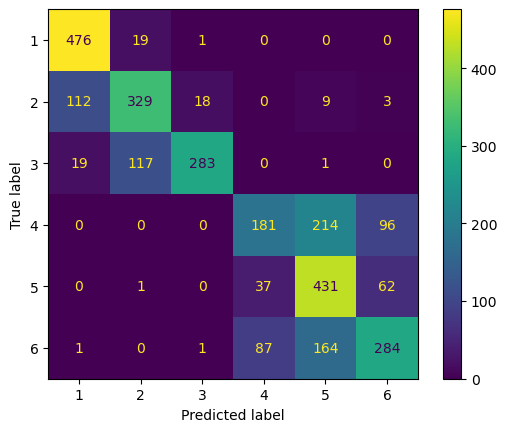

In [138]:
ConfusionMatrixDisplay.from_estimator(estimator=clf,
                                     X=x_test_3,
                                     y=y_test)
plt.show()

> Houve uma pequena queda de acurácia.